In [38]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [39]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.basemap import Basemap
from scipy.io import loadmat
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
#from cartopy import crs, feature
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools, places

#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')



In [40]:
car_suffix = '_dissolved_inorganic_carbon_means_perday_alg2.pkl'

BR1 = 'BR_1st_2015'; BR2 = 'BR_2nd_2015'; BR3 = 'BR_3rd_2015'


LA3rr = 'LA3'
PI3rr = 'PI3'

#var
BR1_var = pickle.load(open('../KEY_MASBAL_LAT_TRANSPORT//pickles/'+BR1+car_suffix , 'rb')) 
BR2_var = pickle.load(open('../KEY_MASBAL_LAT_TRANSPORT//pickles/'+BR2+car_suffix , 'rb')) 
BR3_var = pickle.load(open('../KEY_MASBAL_LAT_TRANSPORT//pickles/'+BR3+car_suffix , 'rb')) 
PI3rr_var = pickle.load((open('../KEY_MASBAL_LAT_TRANSPORT//pickles/'+PI3rr+car_suffix , 'rb')))
Fraser_discharge = pickle.load(open('./pkls/Fraser_2015_year_runoff_m3_s.pkl', 'rb'))  

mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
depth = mesh['gdept_1d'][:]


BR_var = np.zeros([40,365*3])
BR_var[:,0:365] = BR1_var
BR_var[:,365:2*365] = BR2_var
BR_var[:,2*365:3*365] = BR3_var

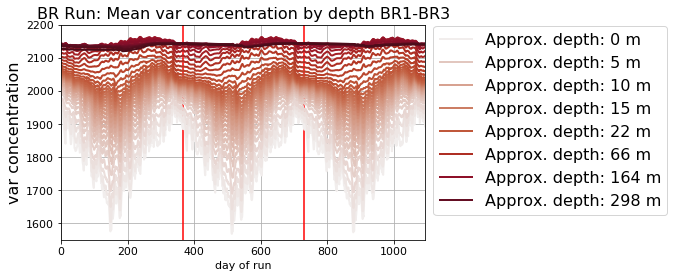

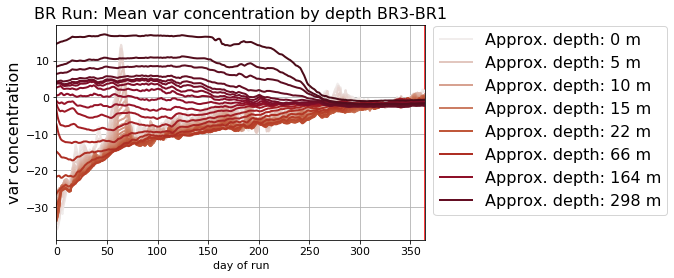

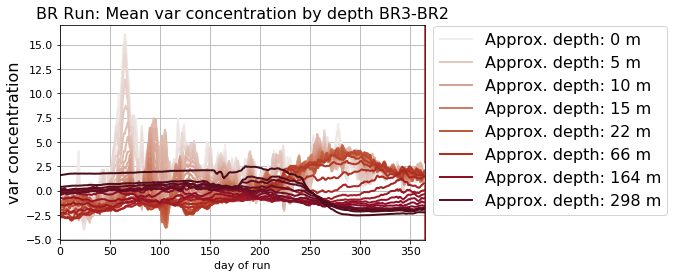

In [41]:
tcm = cm.amp
lw =2
fs = 16
depth = mesh['e3t_0'][0,:,250,250]
fact = 0.5
fig = plt.figure(figsize=(19*fact,8*fact))

days_in = np.arange(0,365*3,1)

#BR
ax = fig.add_subplot(1,1,1)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in,BR_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*3])
plt.ylim([1550,2200])

ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('BR Run: Mean var concentration by depth BR1-BR3', fontsize = fs )
ax.grid()
ax.set_xlabel('day of run')
plt.tight_layout()


lw =2
fs = 16
depth = mesh['e3t_0'][0,:,250,250]
fact = 0.5
fig = plt.figure(figsize=(19*fact,8*fact))

days_in = np.arange(0,365*1,1)

#BR
ax = fig.add_subplot(1,1,1)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in,BR3_var[i,:]-BR1_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR3_var[i,:]-BR1_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*1])
#plt.ylim([1550,2200])

ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('BR Run: Mean var concentration by depth BR3-BR1', fontsize = fs )
ax.grid()
ax.set_xlabel('day of run')
plt.tight_layout()


lw =2
fs = 16
depth = mesh['e3t_0'][0,:,250,250]
fact = 0.5
fig = plt.figure(figsize=(19*fact,8*fact))

days_in = np.arange(0,365*1,1)

#BR
ax = fig.add_subplot(1,1,1)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in,BR3_var[i,:]-BR2_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR3_var[i,:]-BR2_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*1])
#plt.ylim([1550,2200])

ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('BR Run: Mean var concentration by depth BR3-BR2', fontsize = fs )
ax.grid()
ax.set_xlabel('day of run')
plt.tight_layout()


# biology extraction code

In [42]:
tdir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/'
flag ='/KEY_MASBAL_LAT_TRANSPORT/pickles/BR3_flagellates_means_perday_alg2.pkl'
diat ='/KEY_MASBAL_LAT_TRANSPORT/pickles/BR3_diatoms_means_perday_alg2.pkl'
cili ='/KEY_MASBAL_LAT_TRANSPORT/pickles/BR3_ciliates_means_perday_alg2.pkl'
csd = '/KEY_MASBAL_LAT_TRANSPORT/pickles/cellsize_alg2.pkl'

flag_mas = pickle.load(open(tdir+flag, 'rb'))  
diat_mas = pickle.load(open(tdir+diat, 'rb'))
cili_mas = pickle.load(open(tdir+cili, 'rb'))
cs = pickle.load(open(tdir+csd, 'rb'))
mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (mmask['e3t_1d'][:])

mask_broad = np.zeros([40,365])

for i in range(0,365):
    mask_broad[:,i] = depths


flag_mas_mm_m2 = np.nansum((mask_broad*flag_mas),axis = 0)
diat_mas_mm_m2 = np.nansum((mask_broad*diat_mas),axis = 0)
cili_mas_mm_m2 = np.nansum((mask_broad*cili_mas),axis = 0)

# nice plot

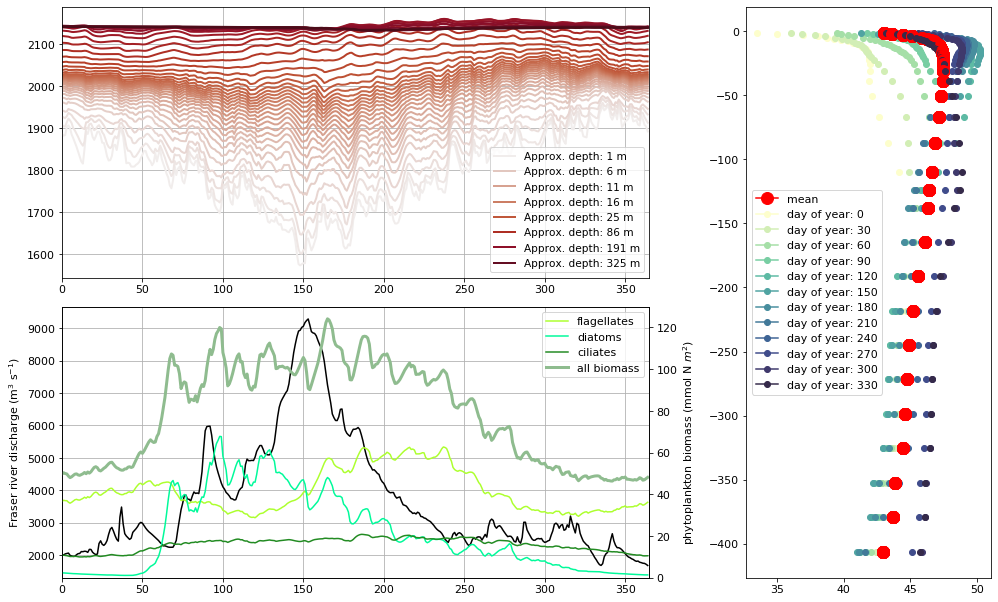

In [51]:
np.nanmean(BR3_var,axis =1)

array([1795.77809624, 1814.5278842 , 1839.04863448, 1860.80062072,
       1886.86347288, 1904.15493298, 1919.25422631, 1931.78201754,
       1942.6948192 , 1952.37577356, 1962.39629776, 1970.47356392,
       1978.05116719, 1985.53999458, 1991.77288634, 1997.78107843,
       2003.3905638 , 2009.09806226, 2015.13332854, 2022.06845803,
       2030.70620886, 2041.72855442, 2055.17391173, 2070.79398812,
       2087.86352338, 2104.49602954, 2118.59481485, 2130.02549497,
       2139.06209533, 2143.54807965, 2143.26196757, 2143.08221854,
       2140.65039196, 2139.47035932, 2139.53486863, 2140.13552748,
       2140.44050661, 2140.40297116, 2139.22200811,           nan])

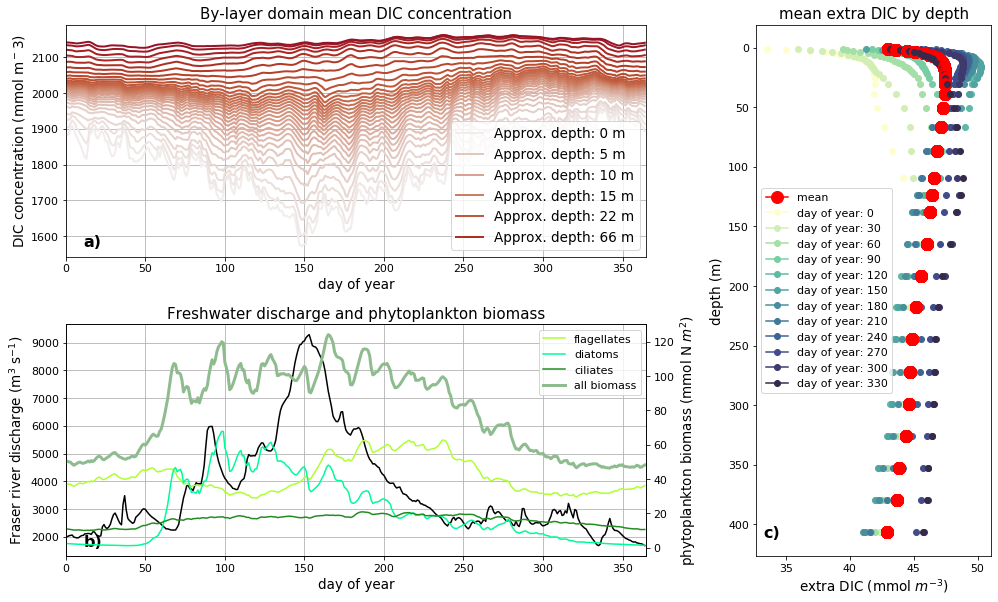

In [70]:
ts = 15 # title font
fs = 13.5 # all other font sizes
fact = 1
fig = plt.figure(figsize=(14*fact, 8.5*fact))

ax1 = plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=1)
tcm = cm.amp
for i in range(0,30):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*i/40),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'best', fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration', fontsize = ts)


ax2 = plt.subplot2grid((2,3), (1,0), colspan=2, rowspan=1)
ax2b =ax2.twinx()
ax2.plot(days_in,Fraser_discharge,'-k')
ax2.grid()
ax2b.plot(days_in,flag_mas_mm_m2,color = 'greenyellow',label ='flagellates')
ax2b.plot(days_in,diat_mas_mm_m2,color = 'mediumspringgreen',label ='diatoms')
ax2b.plot(days_in,cili_mas_mm_m2,color = 'forestgreen',label ='ciliates')
ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
          color = 'darkseagreen', label = 'all biomass', linewidth = 3)
ax2b.legend(loc = 'best')
ax2b.set_ylabel('phytoplankton biomass (mmol N $m^2$)', fontsize = fs)
ax2.set_xlabel('day of year', fontsize = fs)
ax2.set_ylabel('Fraser river discharge (m$^3$ s$^{-1}$)', fontsize = fs)
ax2.set_title('Freshwater discharge and phytoplankton biomass', fontsize = ts)
plt.xlim([0,365*1])
ax2.text(0.03, 0.03, 'b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax3 = plt.subplot2grid((2,3), (0,2), colspan=1, rowspan=2)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
tcm = cm.deep
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')



for d in range(0,12):
    for i in range(0,40):
        zdepth = np.sum(depth[0:i+1]) 
        if ((i == 0) & (d ==0)):        
            ax3.plot((np.nanmean(BR3_var,axis =1)[i]-\
                      np.nanmean(PI3rr_var,axis=1)[i]),zdepth,\
                     marker = 'o', color = 'r', markersize = 12, label = 'mean')
        else:
            ax3.plot((np.nanmean(BR3_var,axis =1)[i]-\
                      np.nanmean(PI3rr_var,axis=1)[i]),zdepth,\
                     marker = 'o', color = 'r', markersize = 12)
        if i == 0:
            ax3.plot((BR3_var[i,d*30]-PI3rr_var[i,d*30]),zdepth,\
                    color = tcm(1.*d/12), marker = 'o', label = 'day of year: '+ str(d*30))
        else:
            ax3.plot((BR3_var[i,d*30]-PI3rr_var[i,d*30]),zdepth,\
                    color = tcm(1.*d/12), marker = 'o')

ax3.set_title('mean extra DIC by depth', fontsize = ts)
ax3.invert_yaxis()
ax3.legend(loc = 'best')
ax3.set_xlabel('extra DIC (mmol $m^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)
fig.tight_layout()





## code for finding fraser river discharge (pkled and commented out)

In [ ]:
import sys
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/VIZ')
sys.path.append('/data/tjarniko/MEOPAR/tools/SalishSeaTools/salishsea_tools/')

import river_201702 as rv
ro_2015 = np.zeros([365,898,398])
import arrow
start = '2015-01-01'
end = '2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)
arrow_array = []
nc_ar = []
for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)
    
for i in range(0,len(arrow_array)):
    tdate = arrow_array[i][0]
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    tstr = f"/results/forcing/rivers/R201702DFraCElse_y{yy}m{mm}d{dd}.nc"
    nc_ar.append(tstr)

for i in range(0,365):
#     if i%20 ==0:
#         print(i)
    t_nc = nc.Dataset(nc_ar[i])
    ro = (np.squeeze(t_nc['rorunoff'][:,:,:]))
    ro_2015[i,:,:] = ro


watersheds = rv.prop_dict.keys()
riv_i = []
riv_j = []
riv_shed = []
riv_name = []
i = 0
for watshed in watersheds:
    rivs = rv.prop_dict[watshed].keys()
    for riv in rivs:
        ti = rv.prop_dict[watshed][riv]['j']
        tj = rv.prop_dict[watshed][riv]['i']
        riv_i.append(ti)
        riv_j.append(tj)
        riv_shed.append(watshed)
        riv_name.append(riv)
        i = i+1
        
tnc = nc.Dataset('/data/tjarniko/results/SAMPL/SalishSea_1ts_20141121_20141121_grid_T_20141121-20141121.nc')
tnc2 = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

#93 is 
for r in range(93,94):
    ti = riv_i[r]
    tj = riv_j[r]
    runoff = ro_2015[:,tj,ti]
    t_area = (tnc.variables['area'][tj,ti])
    year_runoff_use_area = (runoff / 1000) * t_area
    e1t = tnc2.variables['e1t']
    e2t = tnc2.variables['e2t']
    
    year_runoff_use_et = (runoff/ 1000) * e1t[0,tj,ti] *e2t[0,tj,ti]
plt.plot(year_runoff_use_area, label = 'discharge using area')
plt.plot(year_runoff_use_et, linestyle = ':', label = 'discharge using e1t e2t')
plt.legend()
plt.title('Fraser river discharge, year 2015')

pickle.dump(year_runoff_use_area, open("./pkls/Fraser_2015_year_runoff_m3_s.pkl", 'wb'))
